In [ ]:
##Predicting Patient Readmission using Random Forest Classifier

# Scenario: Healthcare – Predicting Patient Readmission
# A hospital wants to predict whether patients are likely to be readmitted within 30 days of discharge. They have historical data about patients, including:
# Age
# BMI (Body Mass Index)
# Blood_Pressure (average systolic reading)
# Days_Hospitalized
# Satisfaction_Score (post-discharge survey rating)
# Readmitted (Yes/No)
# Since individual decision trees can be unstable, the hospital applies Bagging or Random Forest to build an ensemble of trees. This helps reduce variance and improves accuracy in predicting patient readmission risk, which is critical for resource planning and patient care.

In [4]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('healthcare_readmission_500.csv')
df.head()

,Patient_ID,Age,BMI,Blood_Pressure,Days_Hospitalized,Satisfaction_Score,Readmitted
0,PAT1000,63,30.1,139,3,4.7,No
1,PAT1001,76,40.0,118,4,1.9,Yes
2,PAT1002,53,30.3,143,18,2.6,Yes
3,PAT1003,39,32.5,153,13,1.6,Yes
4,PAT1004,67,31.8,144,19,5.0,Yes


In [7]:
X = df.drop(['Patient_ID', 'Readmitted'], axis=1)
y = df['Readmitted'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9333333333333333


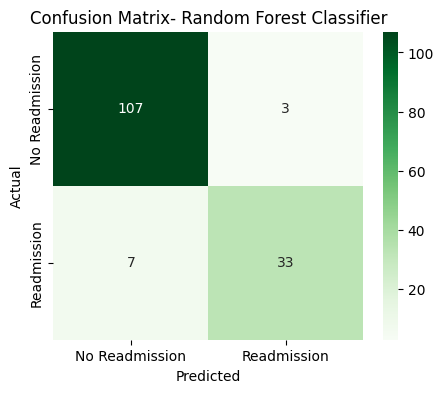

In [16]:
cm = confusion_matrix(y_test, y_pred)

Labels = ['No Readmission', 'Readmission']
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix- Random Forest Classifier')
plt.show()